In [48]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer


In [49]:
medicaldataset = pd.read_csv('Medicaldataset.csv')

In [50]:
medicaldataset

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [51]:
medicaldataset.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [52]:
#diabetes.columns = diabetes.columns.str.lower()
#diabetes.columns

In [53]:
# diabetes.columns = diabetes.columns.str.replace(' ','_')
# diabetes.columns

In [54]:
missing_values = medicaldataset.isnull().sum()
missing_values

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [55]:
medicaldataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [56]:
medicaldataset['Result'] = medicaldataset['Result'].map({'negative': 0, 'positive': 1})

In [57]:
medicaldataset.head(), medicaldataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


(   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
 0   63       1          66                      160                        83   
 1   20       1          94                       98                        46   
 2   56       1          64                      160                        77   
 3   66       1          70                      120                        55   
 4   54       1          64                      112                        65   
 
    Blood sugar  CK-MB  Troponin  Result  
 0        160.0   1.80     0.012       0  
 1        296.0   6.75     1.060       1  
 2        270.0   1.99     0.003       0  
 3        270.0  13.87     0.122       1  
 4        300.0   1.08     0.003       0  ,
 None)

In [58]:
medicaldataset.value_counts('Result')

Result
1    810
0    509
Name: count, dtype: int64

# EDA (Exploratory Data Analysis)

In [59]:
medicaldataset.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


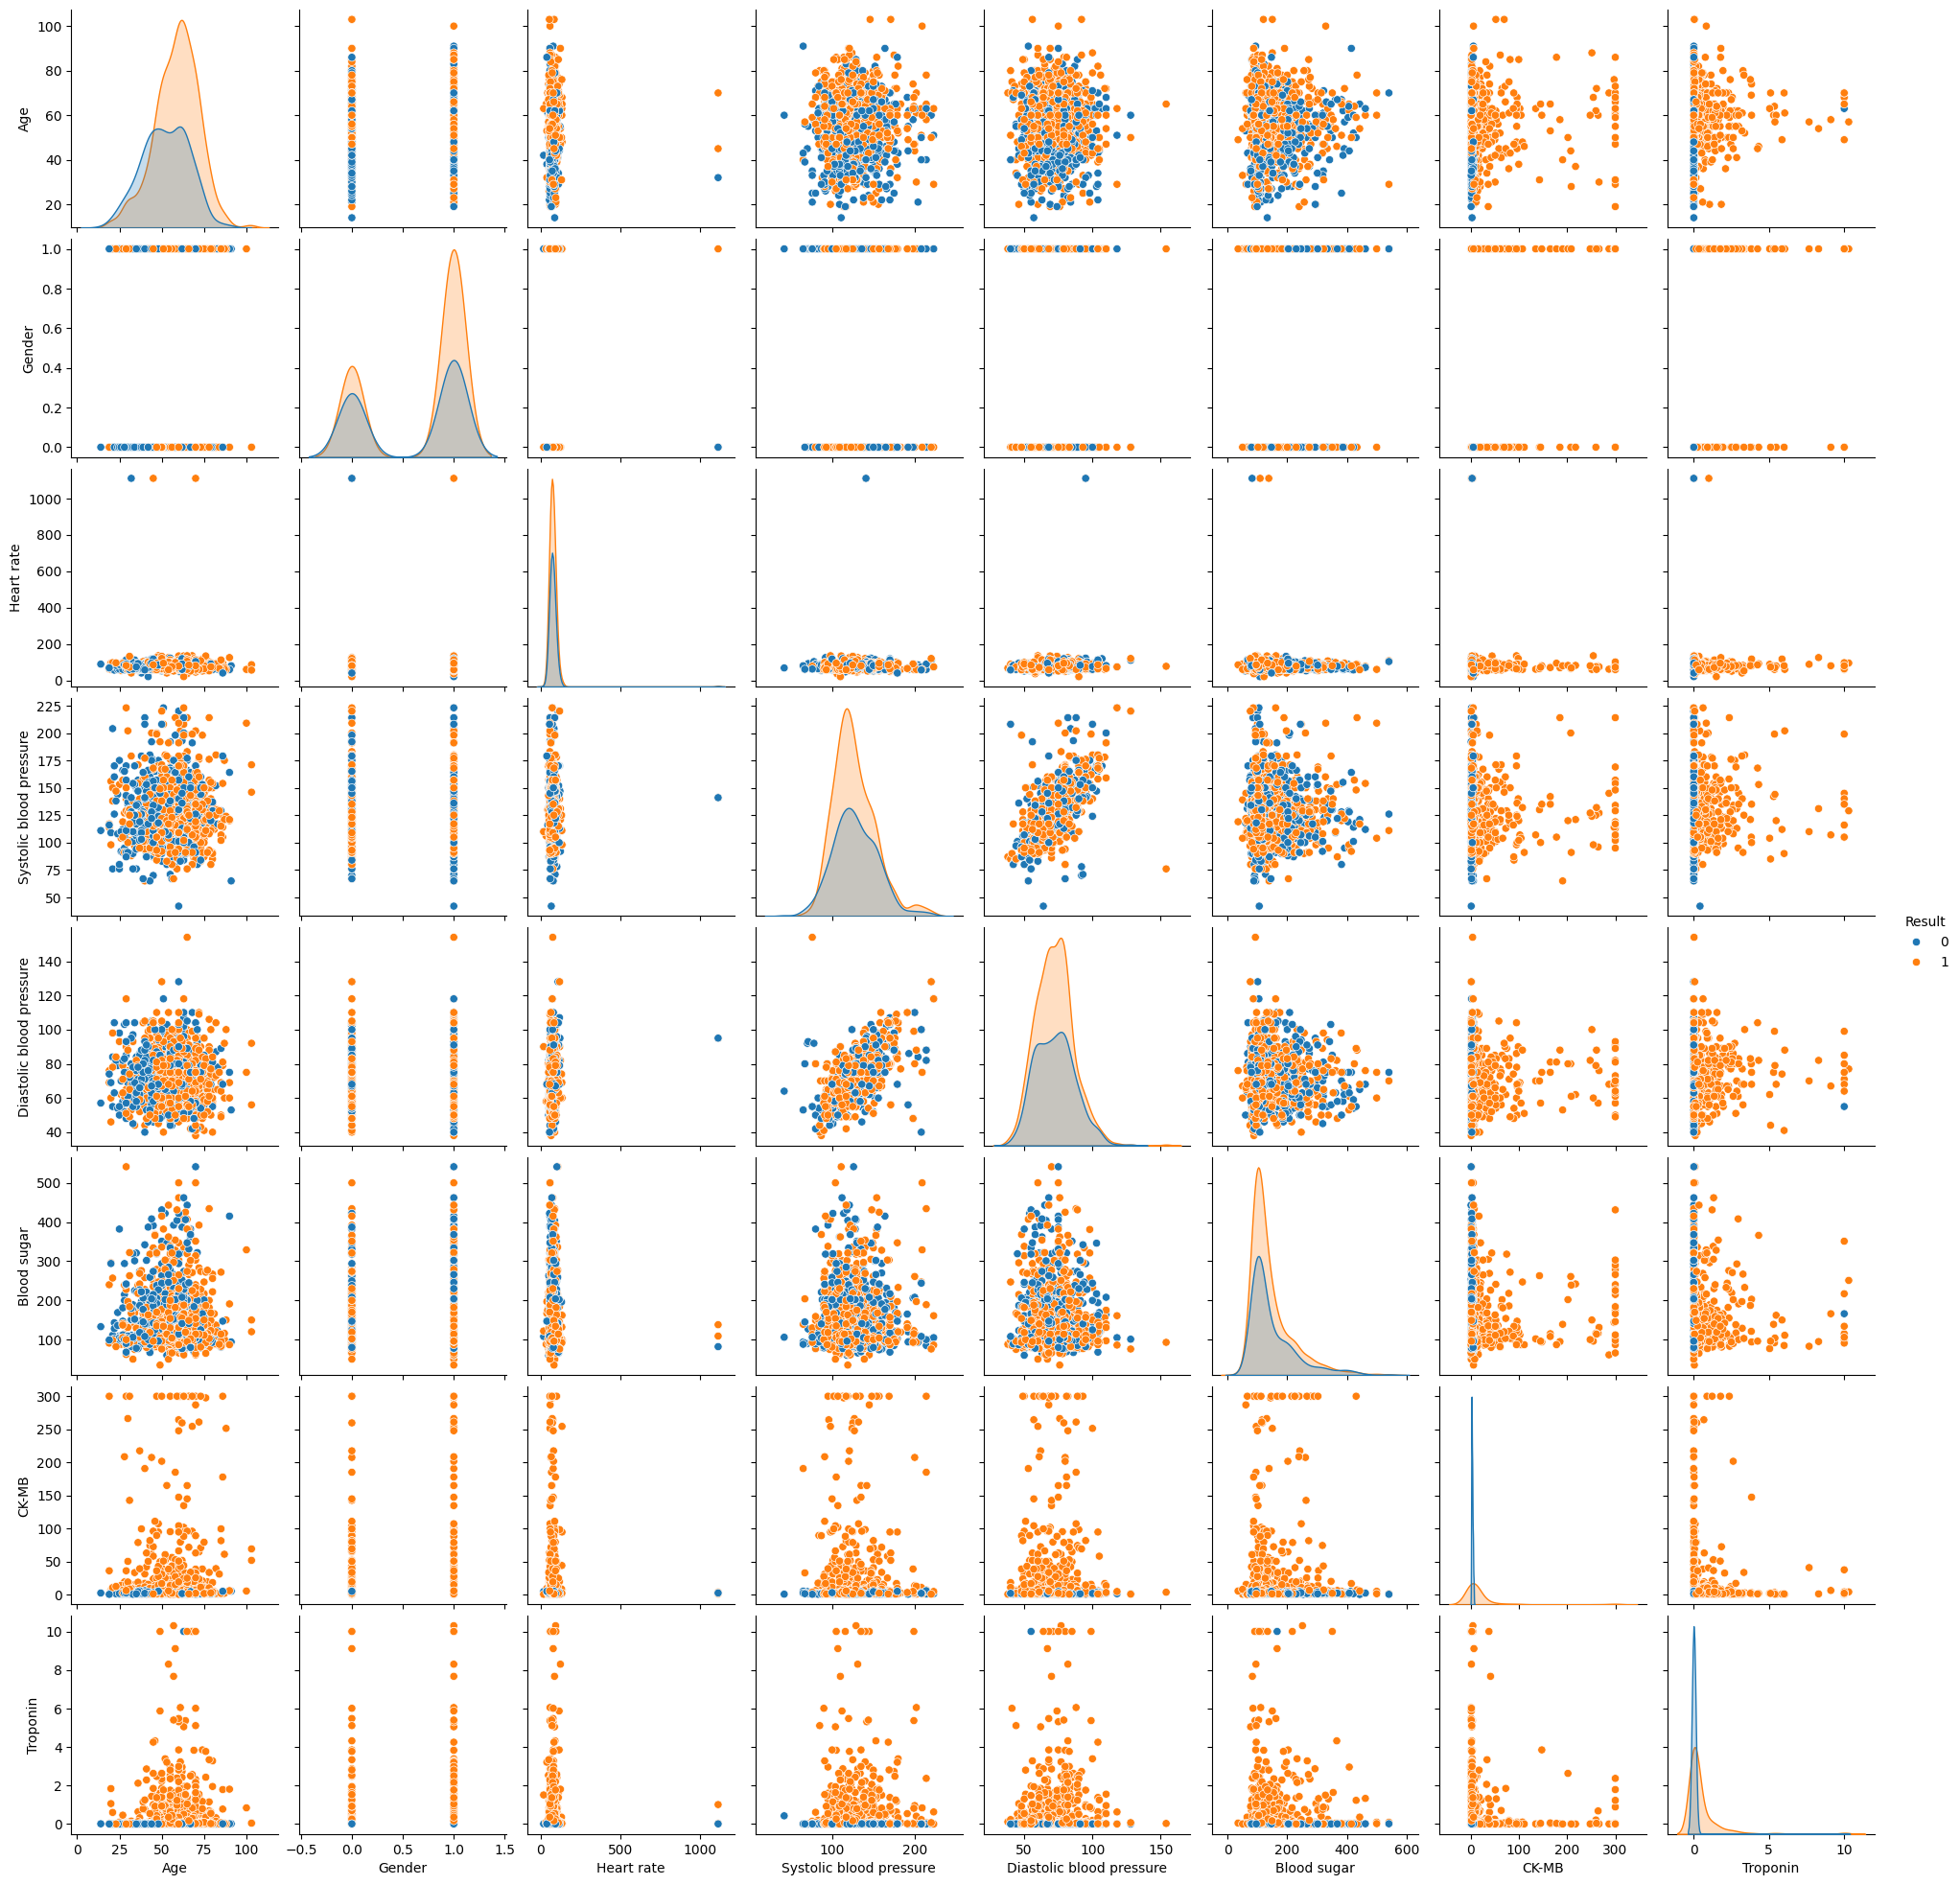

In [60]:
sns.pairplot(medicaldataset, hue="Result")
plt.show()

In [61]:
correlation_matrix = medicaldataset.corr()
result_correlation = correlation_matrix['Result'].sort_values(ascending=False)

print(result_correlation)

Result                      1.000000
Age                         0.238002
Troponin                    0.229376
CK-MB                       0.217720
Gender                      0.094432
Heart rate                  0.006920
Diastolic blood pressure   -0.009659
Systolic blood pressure    -0.020825
Blood sugar                -0.033059
Name: Result, dtype: float64


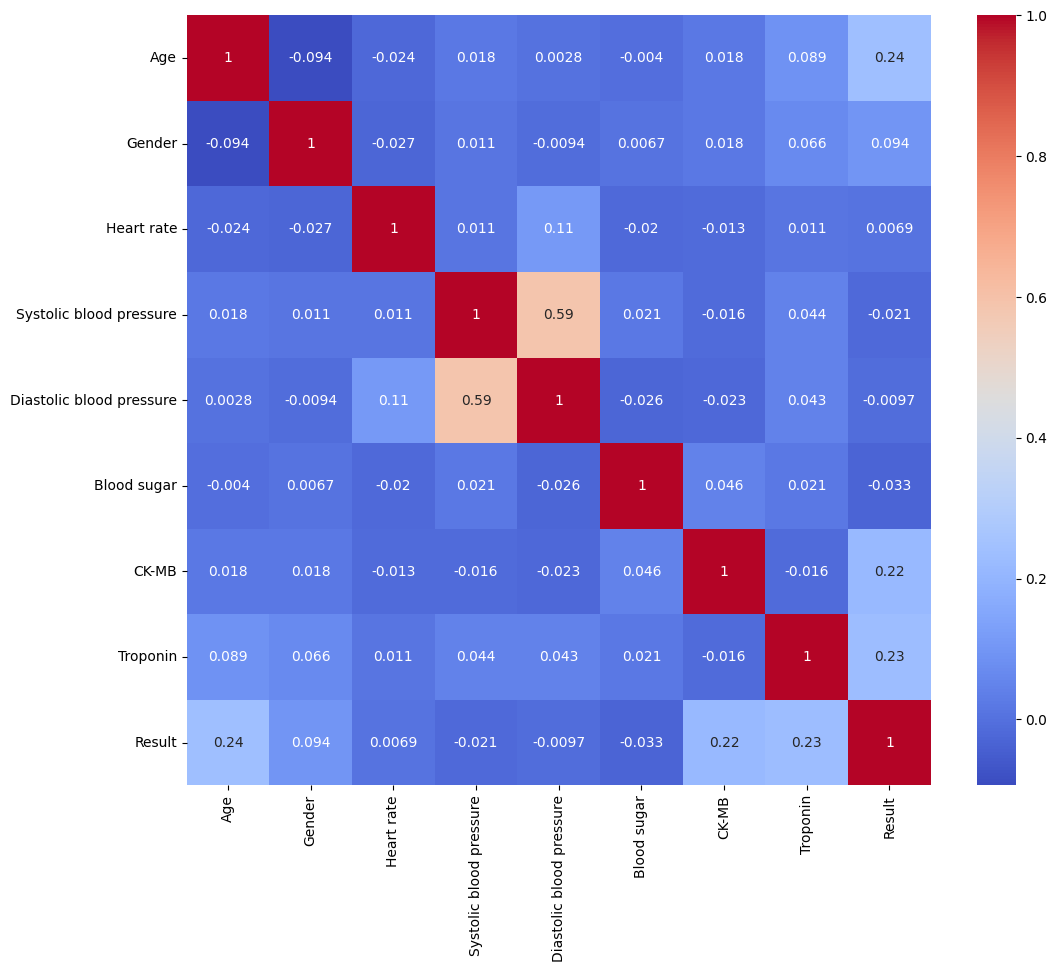

In [62]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [40]:
medicaldataset = medicaldataset.drop(['CK-MB','Heart rate','Systolic blood pressure'], axis=1) #86

In [41]:
# Splitting the dataset into features and target variable
X = medicaldataset.drop('Result', axis=1)
y = medicaldataset['Result']

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# SMOTE on the training set to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Fit and scale on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Converts the scaled arrays back into DataFrames for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

import pickle

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)


In [64]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Function to perform cross-validation and return scores
def perform_cross_validation(models, X, y):
    recall_scorer = make_scorer(recall_score) 
    model_scores = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5, scoring=recall_scorer)
        model_scores[name] = scores
    return model_scores

# Performs cross-validation on the training set
model_scores = perform_cross_validation(models, X_train_scaled_df, y_train_smote)


In [65]:
# Displais the mean and standard deviation of the scores for each model
cv_results = {model: f"{scores.mean():.3f} +/- {2*scores.std():.3f}" for model, scores in model_scores.items()}
print(cv_results)

{'Logistic Regression': '0.674 +/- 0.035', 'Decision Tree': '0.862 +/- 0.095', 'Random Forest': '0.823 +/- 0.100', 'SVM': '0.646 +/- 0.035', 'Gradient Boosting': '0.817 +/- 0.095'}


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pickle

# Parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search setup for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=15), 
                              param_grid=param_grid_dt, 
                              cv=5, 
                              scoring="recall", 
                              n_jobs=-1)

# Fitting GridSearchCV
grid_search_dt.fit(X_train_scaled_df, y_train_smote)

# Best parameters and score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print(best_params_dt, best_score_dt)

# Training Decision Tree model with the best parameters on the training set
dt_best = DecisionTreeClassifier(**best_params_dt, random_state=40)
dt_best.fit(X_train_scaled_df, y_train_smote)

# Saving the trained model
with open("decision_tree.pkl", "wb") as file:
    pickle.dump(dt_best, file)

# Predict on the test set
y_pred = dt_best.predict(X_test_scaled_df)


{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.860477314450564


In [67]:
# Metrics for evaluation
accuracy_test = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Test Accuracy: 0.8000
Precision: 0.8168
Recall: 0.8505
F1 Score: 0.8333
